Problem 2 [Exercise 8.6 LFD]

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import normalize
from utils import linear_models as lm
from utils import data_util as data
from utils import plot as myplot

In [46]:
def generate_data_84(N, x1_lb=0, x1_ub=1, x2_lb=-1, x2_ub=1):
    dim = 1
    max_v = 10000
    x1 = data.generate_random_numbers(N, dim, max_v, x1_lb, x1_ub)
    x2 = data.generate_random_numbers(N, dim, max_v, x2_lb, x2_ub)
    df = pd.DataFrame({'x1':x1.flatten(), 'x2':x2.flatten()})
    df['y'] = np.sign(df['x2'])
    return df

In [47]:
N = 20
N_t = 100
df = generate_data_84(N)
print(f"-- Number of positive points: {df.loc[df['y']>0]['y'].count()}")
X = df[['x1', 'x2']].values
y = df['y'].values
my_svm = lm.SVM()
my_svm.fit(X, y)
print(f"-- In-Sample Error: {my_svm.calc_error(X, y)}")
print(f"-- SVM Margin: {my_svm.margin()}")      
df_t = generate_data_84(N_t)
X_t = df_t[['x1', 'x2']].values
y_t = df_t['y'].values
print(f"-- Out-of-Sample Error: {my_svm.calc_error(X_t, y_t)}")

-- Number of positive points: 11
-- In-Sample Error: 0.0
-- SVM Margin: 0.084138746912156
-- Out-of-Sample Error: 0.06


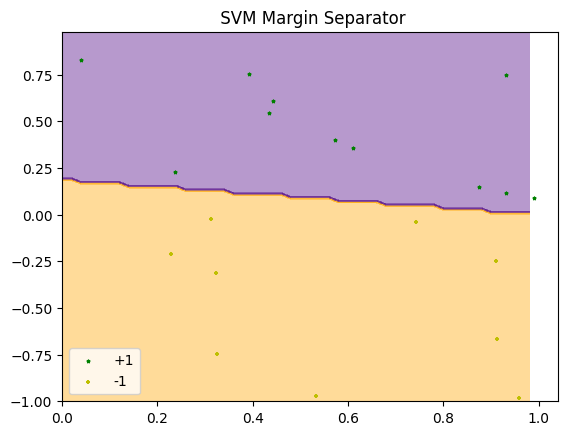

In [48]:
xsp1 = df.loc[df['y']==1]['x1'].values
ysp1 = df.loc[df['y']==1]['x2'].values
xsm1 = df.loc[df['y']==-1]['x1'].values
ysm1 = df.loc[df['y']==-1]['x2'].values

#plt.tight_layout()
X_train = df[['x1', 'x2']].values
y_train = df['y'].values
cls = my_svm
x1_min, x1_max = 0, 1
x2_min, x2_max = -1, 1
xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=0.02)
myplot.plot_decision_boundaries(xx1, xx2, 2, cls)

myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
               colors = ['g', 'y'], markers = ['*', '+'], labels = ['+1', '-1'], 
               title = " SVM Margin Separator", yscale = None, ylb = -1, yub = 1,
               xlb = 0, xub = 1, xlabel = None, ylabel = None,
               legends = ['+1', '-1'], legendx = None, legendy = None, marker_sizes=[5, 5])

In [49]:
df2 = pd.DataFrame({'x0':np.ones(N)})
df1 = df.copy()
df1.insert(0,'x0',df2['x0'])

indexes = np.arange(N)
indexes[18] = 0
indexes[0] = 18
indexes[19] = 17
indexes[17] = 19
df1 = df1.reindex(indexes)

Exercise 8.6 (b)

Number of positive points:  11
Number of negatives points:  9
Final correctness:  20 . Total iteration:  43
Final w: [-1.          0.91059106  3.67746775]
-- Out-of-Sample Error: 0.08


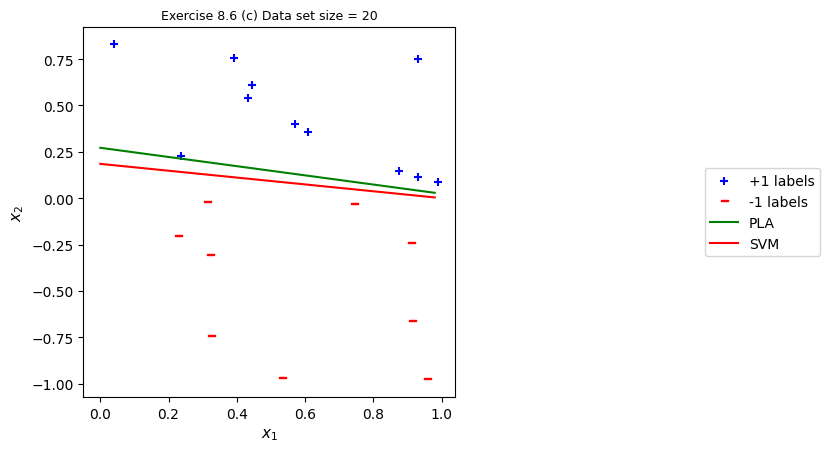

In [50]:
eta = 1
use_adaline=False
maxit = 1000
dim = 2

positives = df1.loc[df1['y']==1]
negatives = df1.loc[df1['y']==-1]

figsize = plt.figaspect(1)
f, ax = plt.subplots(1, 1, figsize=figsize)

ps = ax.scatter(positives[['x1']].values, positives[['x2']].values, marker='+', c= 'b', label='+1 labels')
ns = ax.scatter(negatives[['x1']].values, negatives[['x2']].values, marker=r'$-$', c= 'r', label='-1 labels')
print('Number of positive points: ', len(positives))
print('Number of negatives points: ', len(negatives))

norm_g, num_its, _ = lm.perceptron(df1.values, dim, maxit, use_adaline, eta, 
                                   randomize=False, print_out = True)    


x1 = np.arange(0, 1, 0.02)
norm_g = norm_g/norm_g[-1]

c = np.ones((N_t, 1))
XX_t = np.hstack((c, X_t))        
print(f"-- Out-of-Sample Error: {lm.calc_error(norm_g, XX_t, y_t)}")

# ------- Plotting ------
hypothesis = ax.plot(x1, -(norm_g[0]+norm_g[1]*x1), c = 'g', label='PLA')
svm = ax.plot(x1, -(my_svm.w[0]*x1+my_svm.b)/my_svm.w[1], c = 'r', label='SVM')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Exercise 8.6 (c) Data set size = %s'%N, fontsize=9)
ax.axis('tight')
legend_x = 2.0
legend_y = 0.5
ax.legend(['+1 labels','-1 labels','PLA', 'SVM'], 
          loc='center right', bbox_to_anchor=(legend_x, legend_y))
plt.show()